# Udacity Advance Lane Lines Project

In [31]:
# Place for adding all includes
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os

from moviepy.editor import VideoFileClip
from IPython.display import HTML

global imshow_enable 
imshow_enable = 0
%matplotlib inline

In [32]:
# Try to plot some images here

curr_dir = os.getcwd()

calib_dir = os.path.join(curr_dir, "camera_cal")

calib_images = os.listdir(calib_dir)
print ("Total number of images: %s" % (len(calib_images)))

if imshow_enable == 1:
    plt.figure(figsize=(20, 10))

    for i in range(0, len(calib_images)):
        each = calib_images[i]
        file_name = os.path.join(calib_dir, each)

        plt.subplot(4, 5, i + 1)
        image = cv2.imread(file_name)
        plt.imshow(image)
    plt.show()

Total number of images: 20


### Project pipeline

Pipeline algorithm:

- Camera calibration
- Distortion correction
- Color/gradient threshold
- Perspective transform

### Camera Calibration

In [33]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)

# Code referred from https://github.com/udacity/CarND-Camera-Calibration

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob("./camera_cal/calibration*.jpg")

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)


In [34]:
import pickle
%matplotlib inline

def plot_images(img1, img2, img1_title, img2_title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img1)
    ax1.set_title(img1_title, fontsize=15)
    ax2.imshow(img2)
    ax2.set_title(img2_title, fontsize=15)


def undistort_image(img, objpoints, imgpoints):
    # Test undistortion on an image
    
    img_size = (img.shape[1], img.shape[0])
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

file_name = "camera_cal/calibration1.jpg"
image = cv2.imread(file_name)
undistorted_img = undistort_image(image, objpoints, imgpoints)
if imshow_enable == 1:
    plot_images(image, undistorted_img, "Original Image", "Undistorted Image")

## Perspective transform


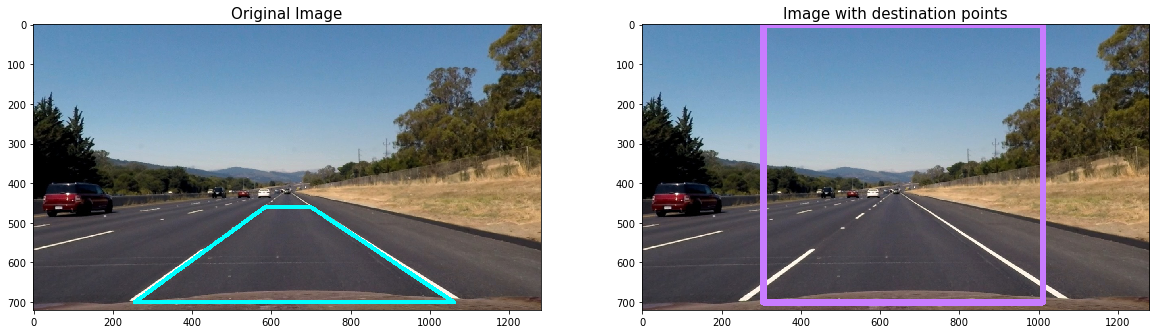

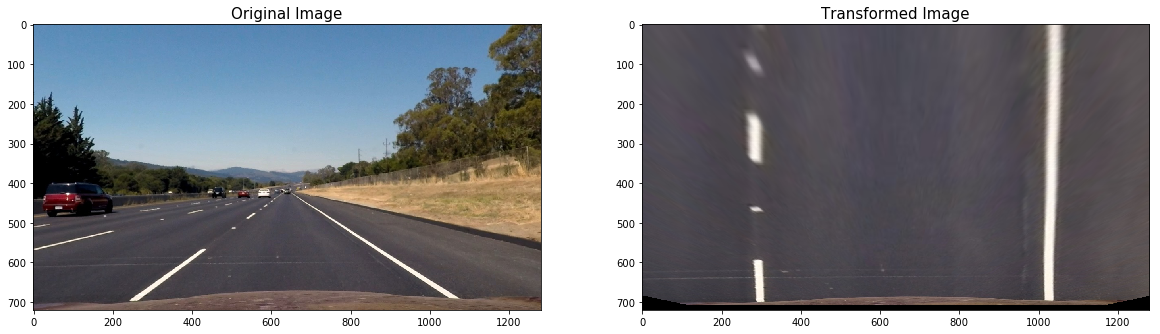

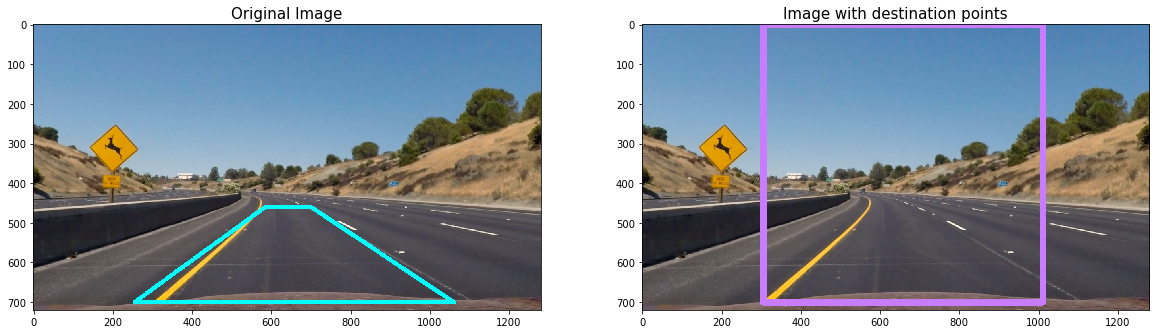

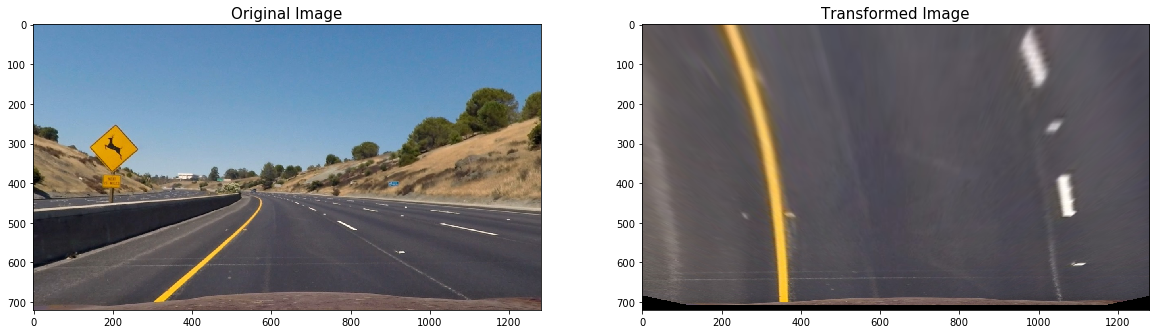

In [35]:
def get_src_dst_wrap_points(image):
#     left_top = [585, 456]
#     left_bottom = [253, 697]
#     right_top = [700, 456]
#     right_bottom = [1061, 690]
    left_top = [585, 460]
    left_bottom = [255, 700]
    right_top = [700, 460]
    right_bottom = [1060, 700]
    src = np.array([ left_top, left_bottom, right_bottom, right_top], np.int32)
    src = src.reshape((-1,1,2))

    offset = 50
    left_edge = left_bottom[0] + offset
    right_edge = right_bottom[0] - offset
    
    left_top = [left_edge, 0]
    left_bottom = [left_edge, left_bottom[1]]
    right_top = [right_edge, 0]
    right_bottom = [right_edge, left_bottom[1]]

    dst = np.array([ left_top, left_bottom, right_bottom, right_top], np.int32)
    dst = dst.reshape((-1,1,2))
    return src, dst

def get_warp_perspective(image, src_pts, dst_pts, image_size):
    src_pts = np.float32(src_pts.tolist())
    dst_pts = np.float32(dst_pts.tolist())

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped_image = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    Minv = cv2.getPerspectiveTransform(dst_pts, src_pts)
    return warped_image

def perspective_transform(img_src):
    img_dst = img_src.copy()
    
    src_pts, dst_pts = get_src_dst_wrap_points(img_src)
    
    warped = get_warp_perspective(img_src, src_pts, dst_pts, (img_src.shape[1], img_src.shape[0]))  
    return warped

def show_src_dst_image_warps(img):
    img_src = img.copy()
    img_dst = img_src.copy()

    src_pts, dst_pts = get_src_dst_wrap_points(img_src)
    
    src_img = cv2.polylines(img_src, [src_pts], True, (0,255,255), 10)
    dst_img = cv2.polylines(img_dst, [dst_pts], True, (200,124,255), 15)
    if imshow_enable == 1:
        plot_images(src_img, dst_img, "Original Image" , "Image with destination points")


# file_name = "./test_images/straight_lines1.jpg"

file_list = ["./test_images/straight_lines2.jpg",
             "./test_images/test2.jpg"]

imshow_enable = 1

for file_name in file_list:    
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = undistort_image(image, objpoints, imgpoints)
    show_src_dst_image_warps(image)

    warped_img = perspective_transform(image)
    if imshow_enable == 1:
        plot_images(image, warped_img, "Original Image", "Transformed Image")

